In [ ]:
import pandas as pd

# Read the text file (adjust delimiter as needed)
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='\t')  # use '\t' if tab-separated, ',' if comma-separated

# Save as CSV
df.to_csv('insurance_data.csv', index=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_20324\2119687635.py:8: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/insurance_data.csv")  # update separator if needed


Descriptive statistics for numeric columns:

        TotalPremium    TotalClaims  CustomValueEstimate
count  973382.000000  973382.000000         2.146630e+05
mean       61.737566      65.583857         2.244353e+05
std       231.722484    2390.027959         5.718529e+05
min      -782.576754  -12002.412281         2.000000e+04
25%         0.000000       0.000000         1.350000e+05
50%         2.175614       0.000000         2.200000e+05
75%        21.929825       0.000000         2.800000e+05
max     65282.603421  393092.105263         2.655000e+07
TotalPremium Summary:
Mean: 61.74
Median: 2.18
Std: 231.72
Min: -782.58
Max: 65282.60
------------------------------
TotalClaims Summary:
Mean: 65.58
Median: 0.00
Std: 2390.03
Min: -12002.41
Max: 393092.11
------------------------------
CustomValueEstimate Summary:
Mean: 224435.26
Median: 220000.00
Std: 571852.87
Min: 20000.00
Max: 26550000.00
------------------------------


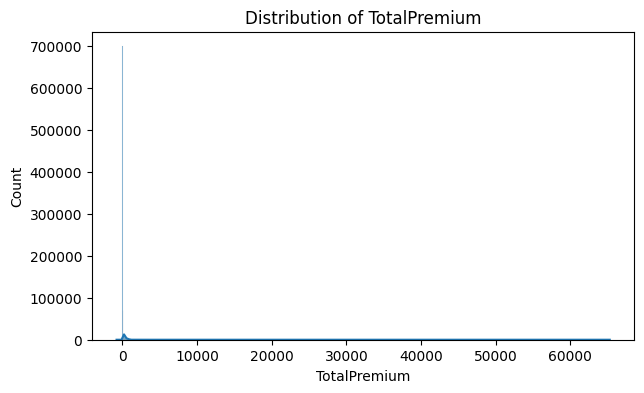

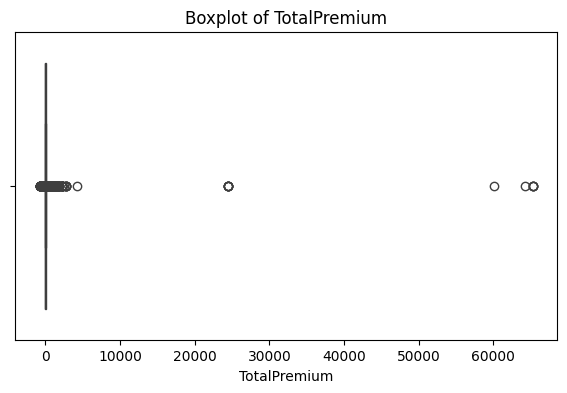

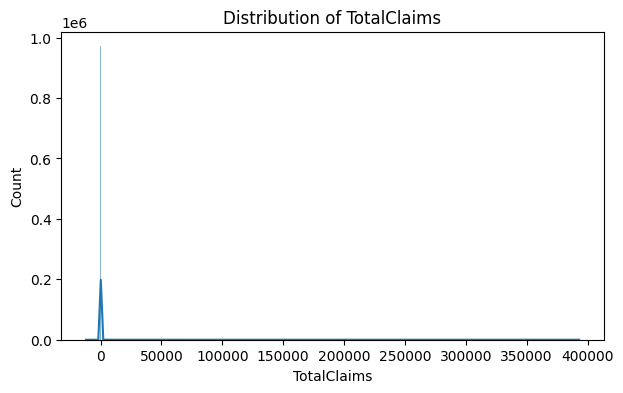

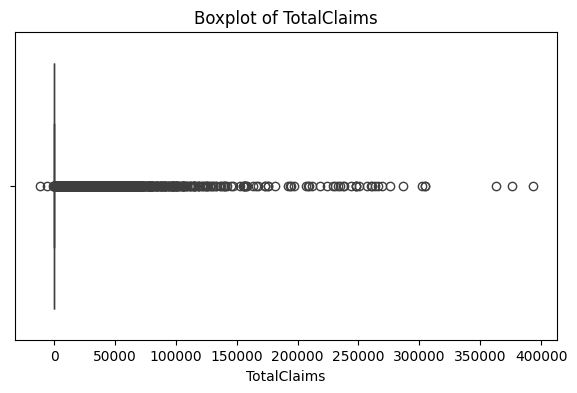

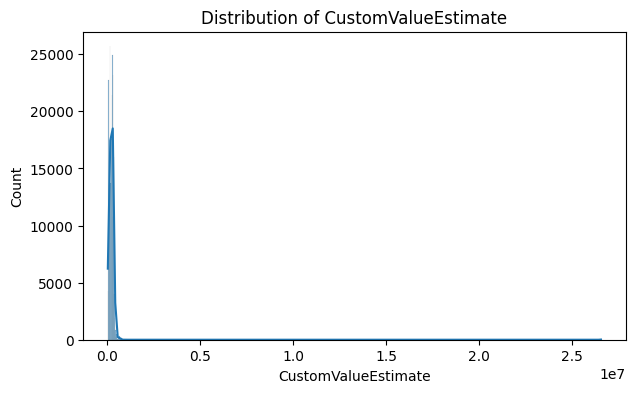

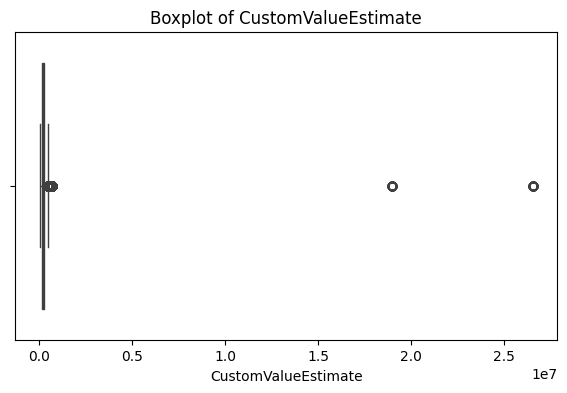

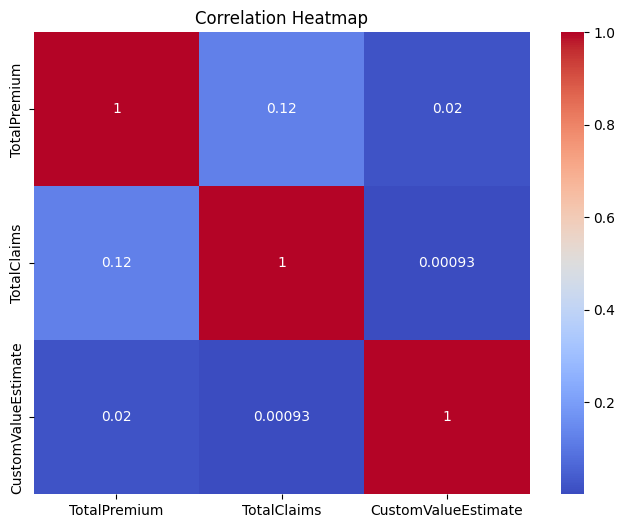

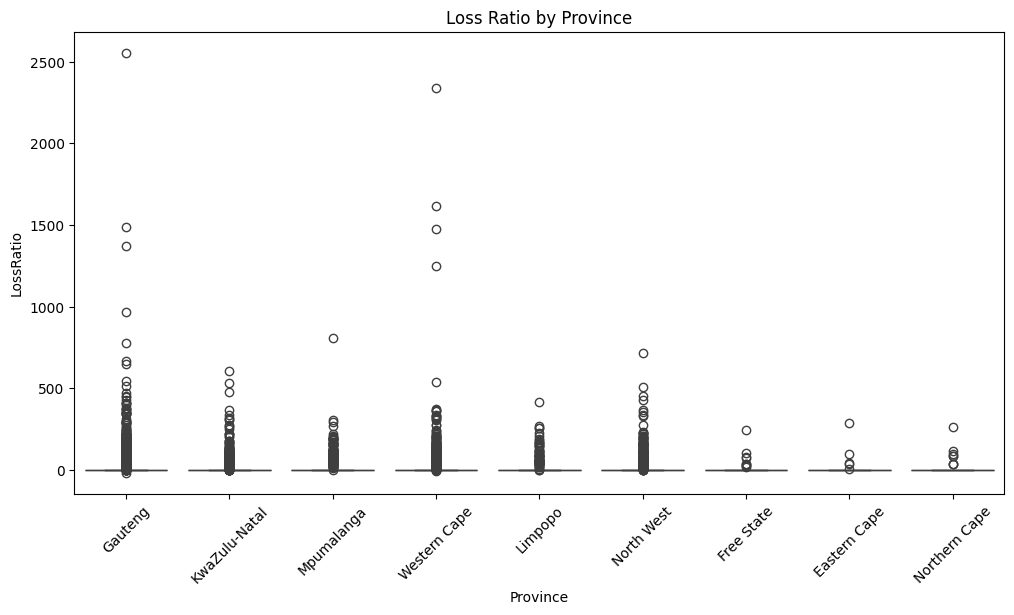

In [27]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data (update path as needed)
df = pd.read_csv("../data/insurance_data.csv")  # update separator if needed

# Create plots folder if it doesn't exist
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Convert numeric columns
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# -----------------------------
# 1. Descriptive Statistics
# -----------------------------
print("Descriptive statistics for numeric columns:\n")
print(df[numeric_cols].describe())

for col in numeric_cols:
    print(f"{col} Summary:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print("-"*30)

# -----------------------------
# 2. Univariate Analysis
# -----------------------------
for col in numeric_cols:
    # Histogram
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"{plot_dir}/hist_{col}.png")
    plt.show()
    plt.close()

    # Boxplot
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.savefig(f"{plot_dir}/box_{col}.png")
    plt.show()
    plt.close()

# -----------------------------
# 3. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig(f"{plot_dir}/correlation_heatmap.png")
plt.show()
plt.close()

# -----------------------------
# 4. Bivariate Example
# -----------------------------
if 'Province' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x='Province', y='LossRatio')
    plt.xticks(rotation=45)
    plt.title("Loss Ratio by Province")
    plt.savefig(f"{plot_dir}/lossratio_by_province.png")
    plt.show()
    plt.close()


In [23]:
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Convert to numeric (in case they are still strings)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Descriptive stats
print(df[numeric_cols].describe())


        TotalPremium    TotalClaims  CustomValueEstimate
count  973382.000000  973382.000000         2.146630e+05
mean       61.737566      65.583857         2.244353e+05
std       231.722484    2390.027959         5.718529e+05
min      -782.576754  -12002.412281         2.000000e+04
25%         0.000000       0.000000         1.350000e+05
50%         2.175614       0.000000         2.200000e+05
75%        21.929825       0.000000         2.800000e+05
max     65282.603421  393092.105263         2.655000e+07


In [16]:
# Load CSV to confirm
df = pd.read_csv('insurance_data.csv',delimiter='|')
print(df.head())
print(df.columns)

C:\Users\PC\AppData\Local\Temp\ipykernel_20324\2579125020.py:2: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('insurance_data.csv',delimiter='|')


  UnderwrittenCoverID  PolicyID     TransactionMonth IsVATRegistered  \
0              145249   12827.0  2015-03-01 00:00:00            True   
1              145249   12827.0  2015-05-01 00:00:00            True   
2              145249   12827.0  2015-07-01 00:00:00            True   
3              145255   12827.0  2015-05-01 00:00:00            True   
4              145255   12827.0  2015-07-01 00:00:00            True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen  

In [20]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.isnull().sum())

(1000098, 52)
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
UnderwrittenCoverID          object
PolicyID                    float64

In [21]:
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Descriptive statistics
print(df[numeric_cols].describe())

# Individual statistics
for col in numeric_cols:
    print(f"{col} Summary:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print("-"*30)


        TotalPremium    TotalClaims  CustomValueEstimate
count  973382.000000  973382.000000         2.146630e+05
mean       61.737566      65.583857         2.244353e+05
std       231.722484    2390.027959         5.718529e+05
min      -782.576754  -12002.412281         2.000000e+04
25%         0.000000       0.000000         1.350000e+05
50%         2.175614       0.000000         2.200000e+05
75%        21.929825       0.000000         2.800000e+05
max     65282.603421  393092.105263         2.655000e+07
TotalPremium Summary:
Mean: 61.74
Median: 2.18
Std: 231.72
Min: -782.58
Max: 65282.60
------------------------------
TotalClaims Summary:
Mean: 65.58
Median: 0.00
Std: 2390.03
Min: -12002.41
Max: 393092.11
------------------------------
CustomValueEstimate Summary:
Mean: 224435.26
Median: 220000.00
Std: 571852.87
Min: 20000.00
Max: 26550000.00
------------------------------


In [22]:
df.to_csv('../data/insurance_data.csv', index=False)